## Praktikum 1

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Load dataset
df = pd.read_csv('dataset/Mall_Customers.csv')

# Inspect info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Slicing - Select Annual Income and Spending Score only
X = df.iloc[:, [3, 4]].values # property values will take only the 'values' -> return in ndarray

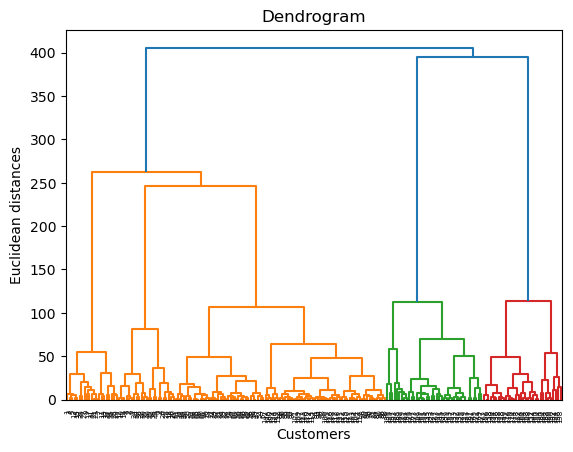

In [5]:
# Build dendogram
import scipy.cluster.hierarchy as sch

# Build dendogram using ward distance
# more info - https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# Plot
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [6]:
# Build Cluster using Agglomerative Method
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

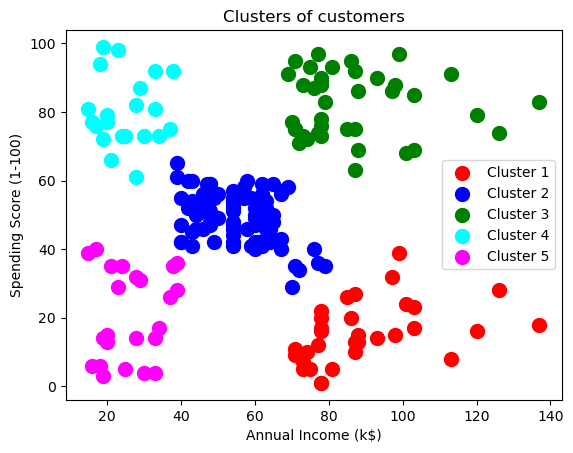

In [7]:
# Visualize The Result
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import silhouette_score

# Evaluate the clustering using silhouette coefficient
silhouette_avg = silhouette_score(X, y_hc)
print(f'Silhouette Coefficient: {silhouette_avg}')

Silhouette Coefficient: 0.5529945955148897


## Praktikum 2

In [9]:
!pip install hdbscan

     ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
     - -------------------------------------- 0.3/6.9 MB ? eta -:--:--
     --- ------------------------------------ 0.5/6.9 MB 1.4 MB/s eta 0:00:05
     ------ --------------------------------- 1.0/6.9 MB 1.5 MB/s eta 0:00:04
     ------- -------------------------------- 1.3/6.9 MB 1.4 MB/s eta 0:00:04
     --------- ------------------------------ 1.6/6.9 MB 1.4 MB/s eta 0:00:04
     ---------- ----------------------------- 1.8/6.9 MB 1.4 MB/s eta 0:00:04
     ------------ --------------------------- 2.1/6.9 MB 1.4 MB/s eta 0:00:04
     ------------- -------------------------- 2.4/6.9 MB 1.4 MB/s eta 0:00:04
     --------------- ------------------------ 2.6/6.9 MB 1.4 MB/s eta 0:00:04
     ---------------- ----------------------- 2.9/6.9 MB 1.4 MB/s eta 0:00:03
     ------------------ --------------------- 3.1/6.9 MB 1.4 MB/s eta 0:00:03
     --

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import hdbscan

In [11]:
def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))
    labels = labels if labels is not None else np.ones(X.shape[0])
    probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    proba_map = {idx: probabilities[idx] for idx in range(len(labels))}
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # warna hitam untuk noise
        class_index = (labels == k).nonzero()[0]
        for ci in class_index:
            ax.plot(
                X[ci, 0],
                X[ci, 1],
                "x" if k == -1 else "o",
                markerfacecolor=tuple(col),
                markeredgecolor="k",
                markersize=4 if k == -1 else 1 + 5 * proba_map[ci],
            )
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of clusters: {n_clusters_}"
    if parameters is not None:
        parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
        title += f" | {parameters_str}"
    ax.set_title(title)
    plt.tight_layout()

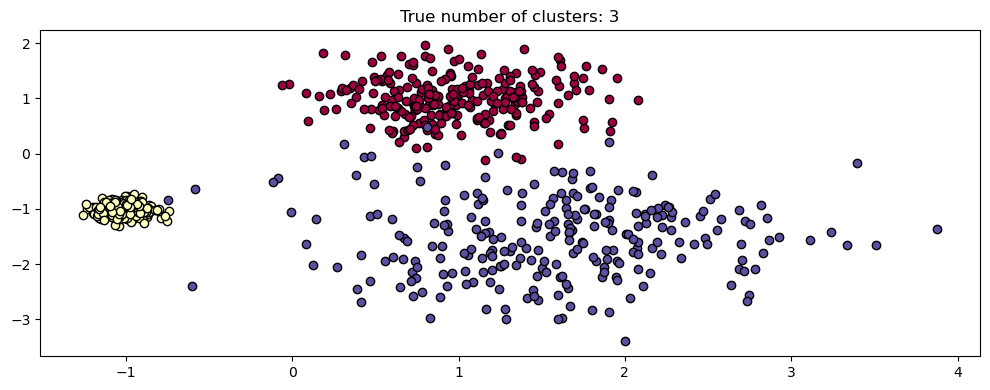

In [12]:
centers = [[1, 1], [-1, -1], [1.5, -1.5]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=[0.4, 0.1, 0.75], random_state=0
)

plot(X, labels=labels_true, ground_truth=True)

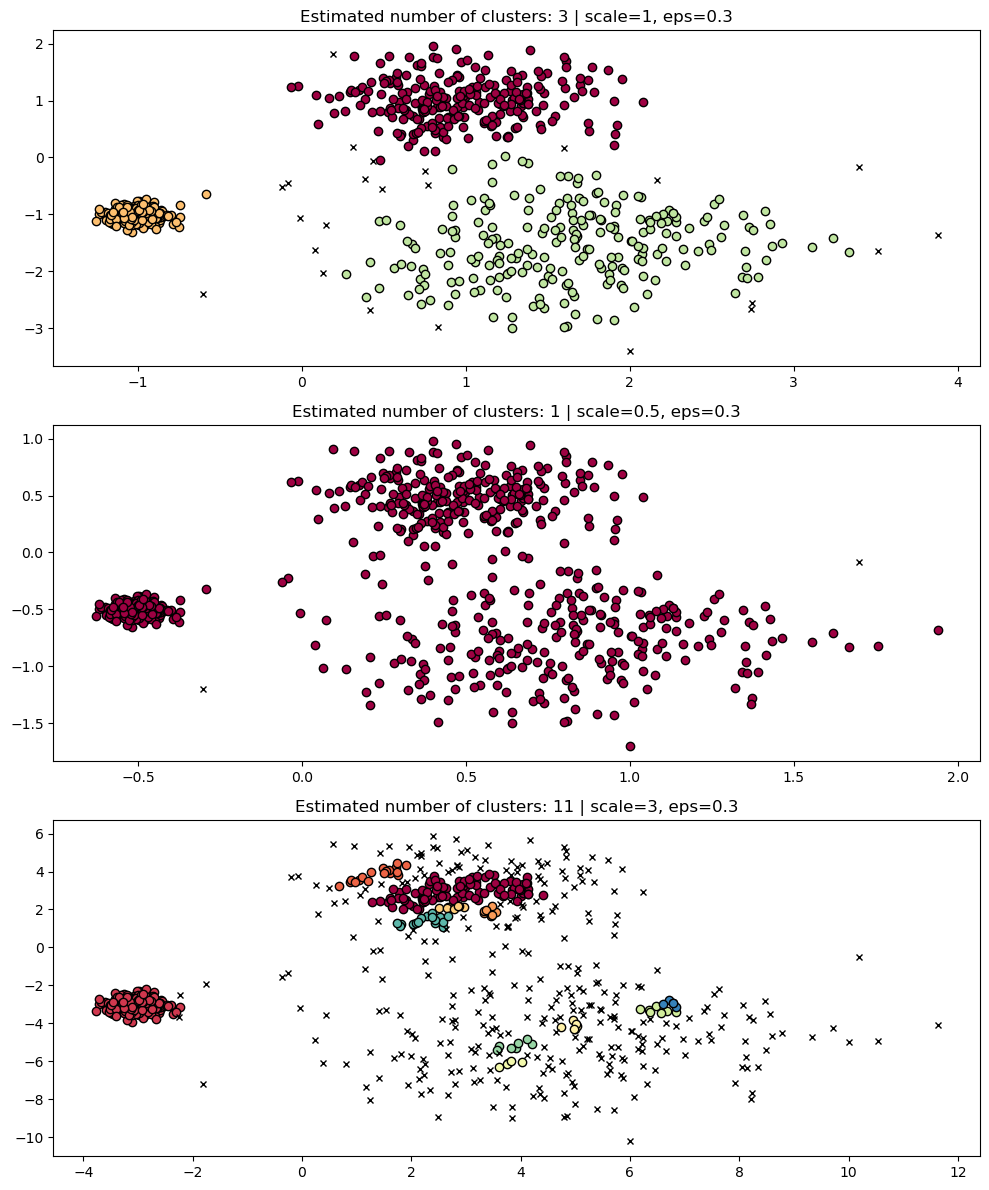

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
dbs = DBSCAN(eps=0.3)
for idx, scale in enumerate([1, 0.5, 3]):
    dbs.fit(X * scale)
    plot(X * scale, dbs.labels_, parameters={"scale": scale, "eps": 0.3}, ax=axes[idx])

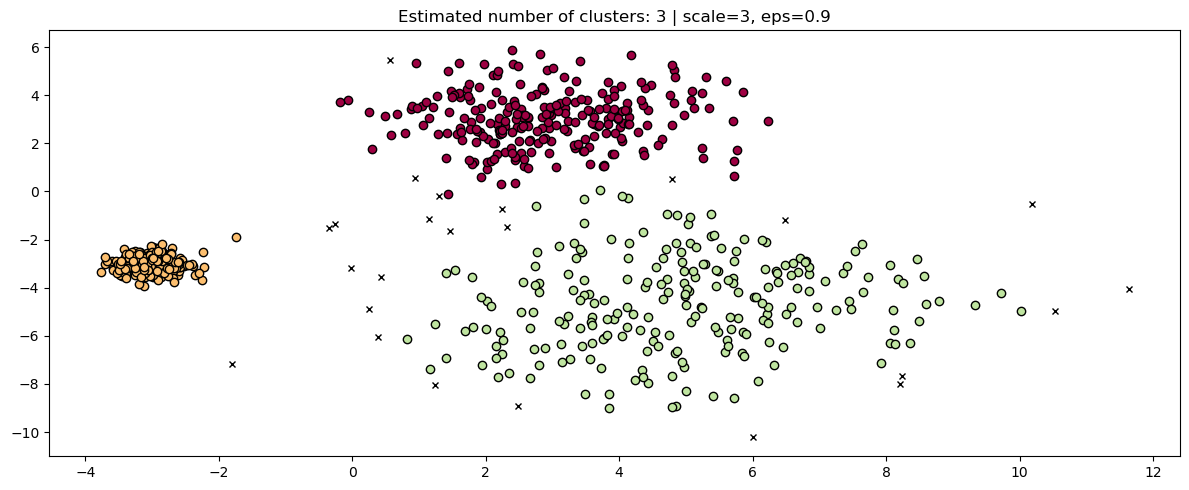

In [14]:
fig, axis = plt.subplots(1, 1, figsize=(12, 5))
dbs = DBSCAN(eps=0.9).fit(3 * X)
plot(3 * X, dbs.labels_, parameters={"scale": 3, "eps": 0.9}, ax=axis)

c:\Users\innam\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\innam\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\innam\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\innam\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\innam\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\i

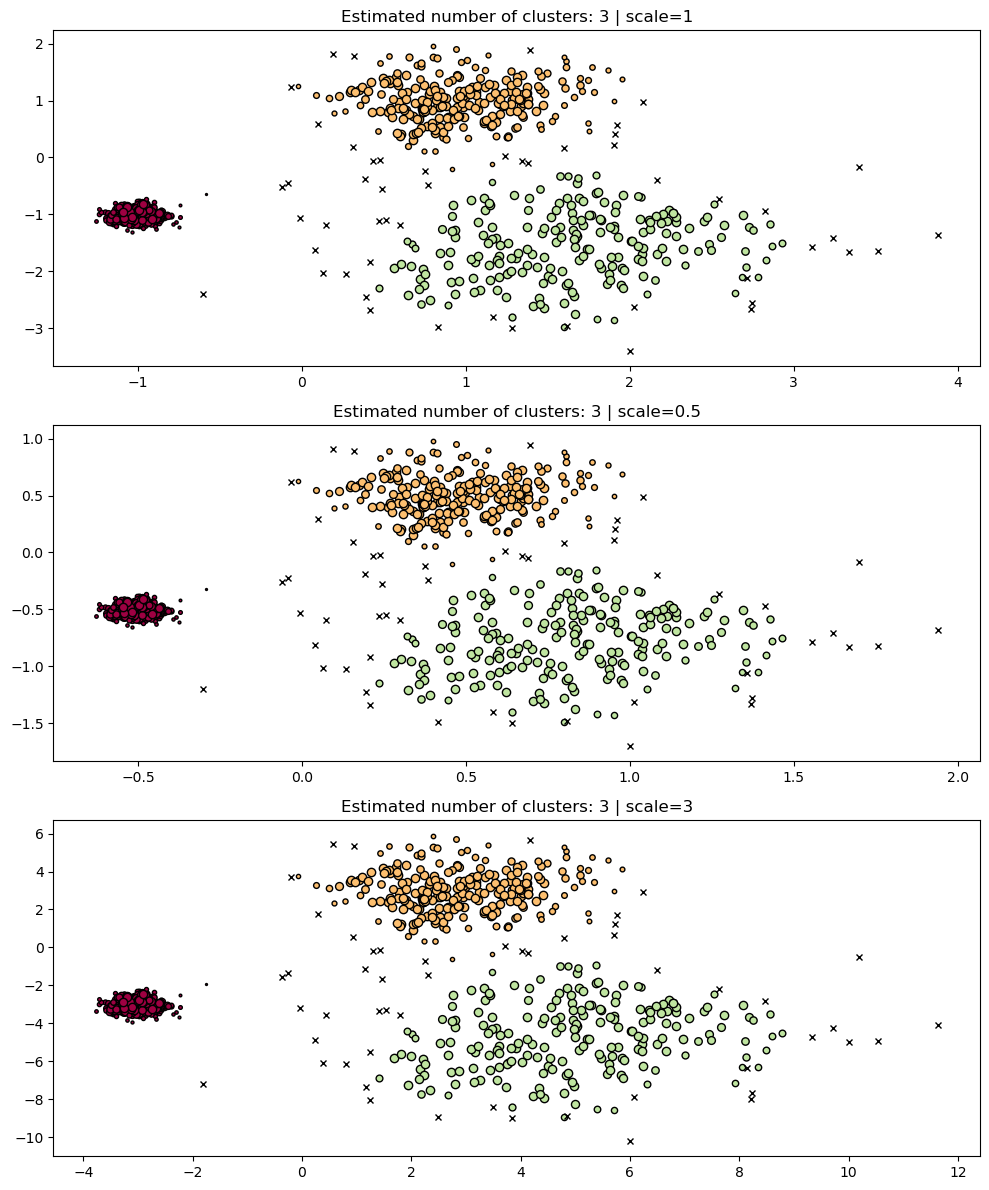

In [15]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
hdb = hdbscan.HDBSCAN()
for idx, scale in enumerate([1, 0.5, 3]):
    hdb.fit(X * scale)
    plot(X * scale, hdb.labels_, hdb.probabilities_, ax=axes[idx], parameters={"scale": scale})

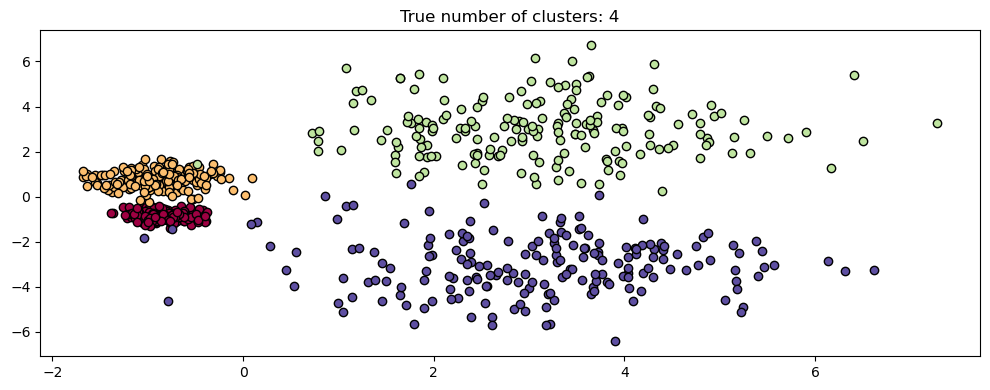

In [16]:
centers = [[-0.85, -0.85], [-0.85, 0.85], [3, 3], [3, -3]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=[0.2, 0.35, 1.35, 1.35], random_state=0
)
plot(X, labels=labels_true, ground_truth=True)

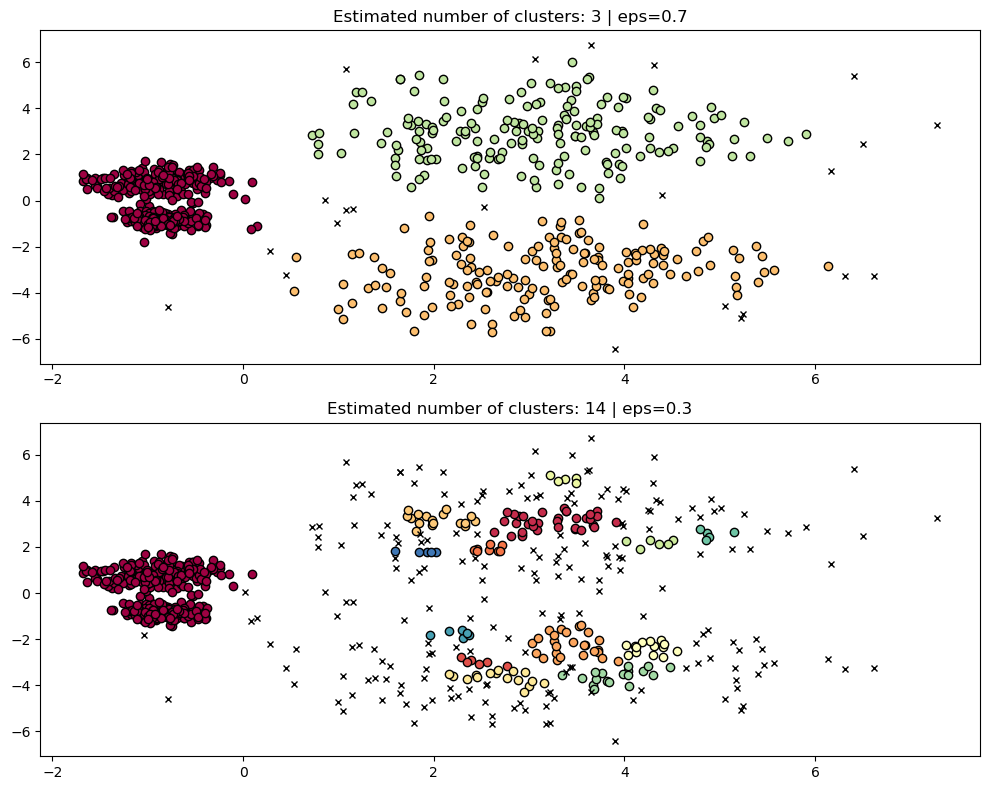

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
params = {"eps": 0.7}
dbs = DBSCAN(**params).fit(X)
plot(X, dbs.labels_, parameters=params, ax=axes[0])

params = {"eps": 0.3}
dbs = DBSCAN(**params).fit(X)
plot(X, dbs.labels_, parameters=params, ax=axes[1])

c:\Users\innam\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\innam\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


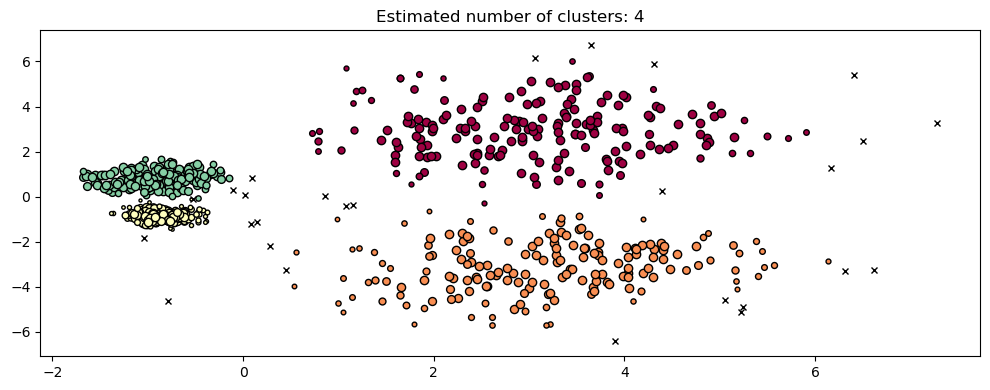

In [18]:
hdb = hdbscan.HDBSCAN().fit(X)
plot(X, hdb.labels_, hdb.probabilities_)

## Praktikum 3

c:\Users\innam\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\innam\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\innam\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\innam\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\innam\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\i

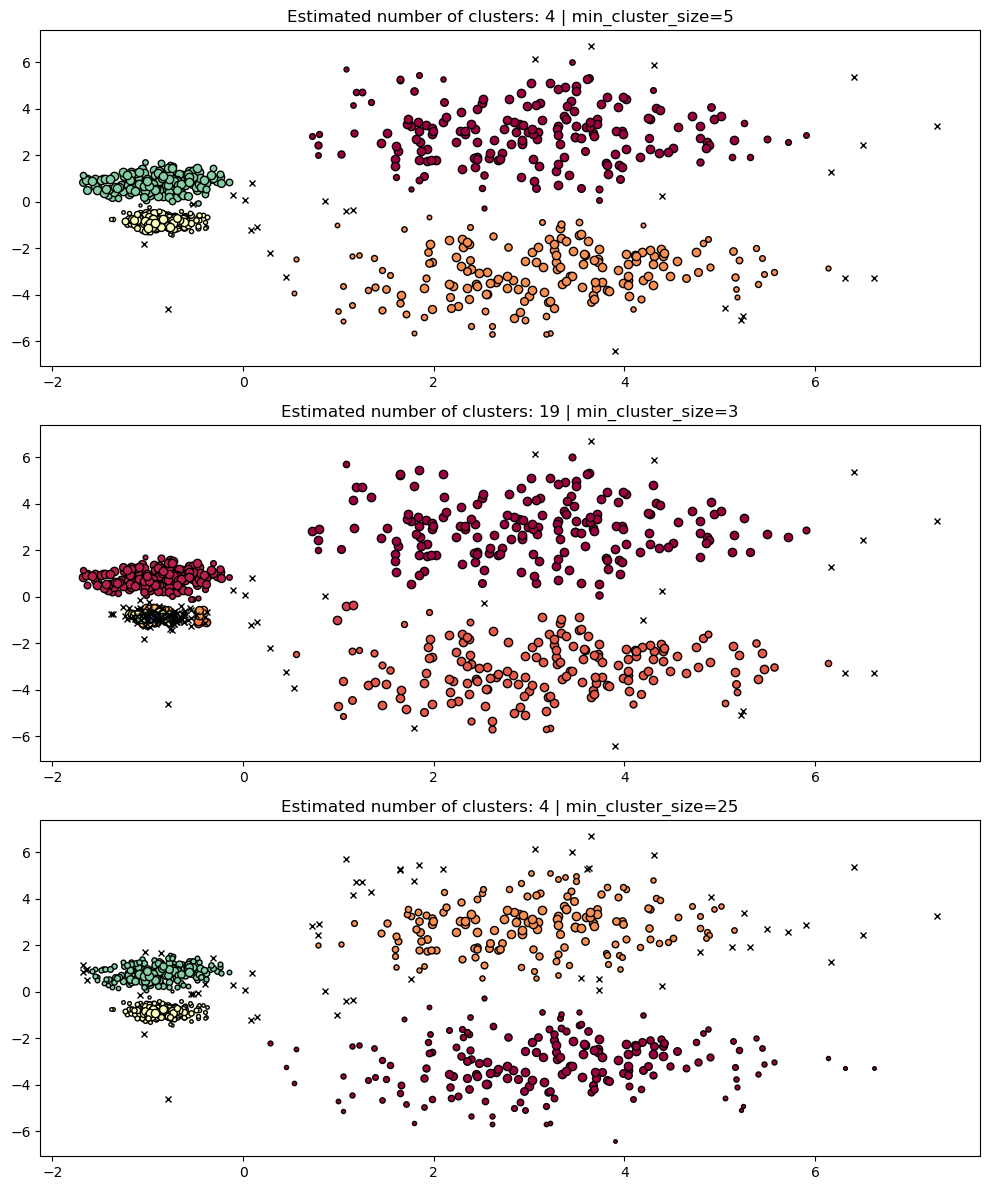

In [19]:
PARAM = ({"min_cluster_size": 5}, {"min_cluster_size": 3}, {"min_cluster_size": 25})
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    hdb = hdbscan.HDBSCAN(**param).fit(X)
    plot(X, hdb.labels_, hdb.probabilities_, param, ax=axes[i])

c:\Users\innam\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\innam\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\innam\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\innam\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\innam\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\i

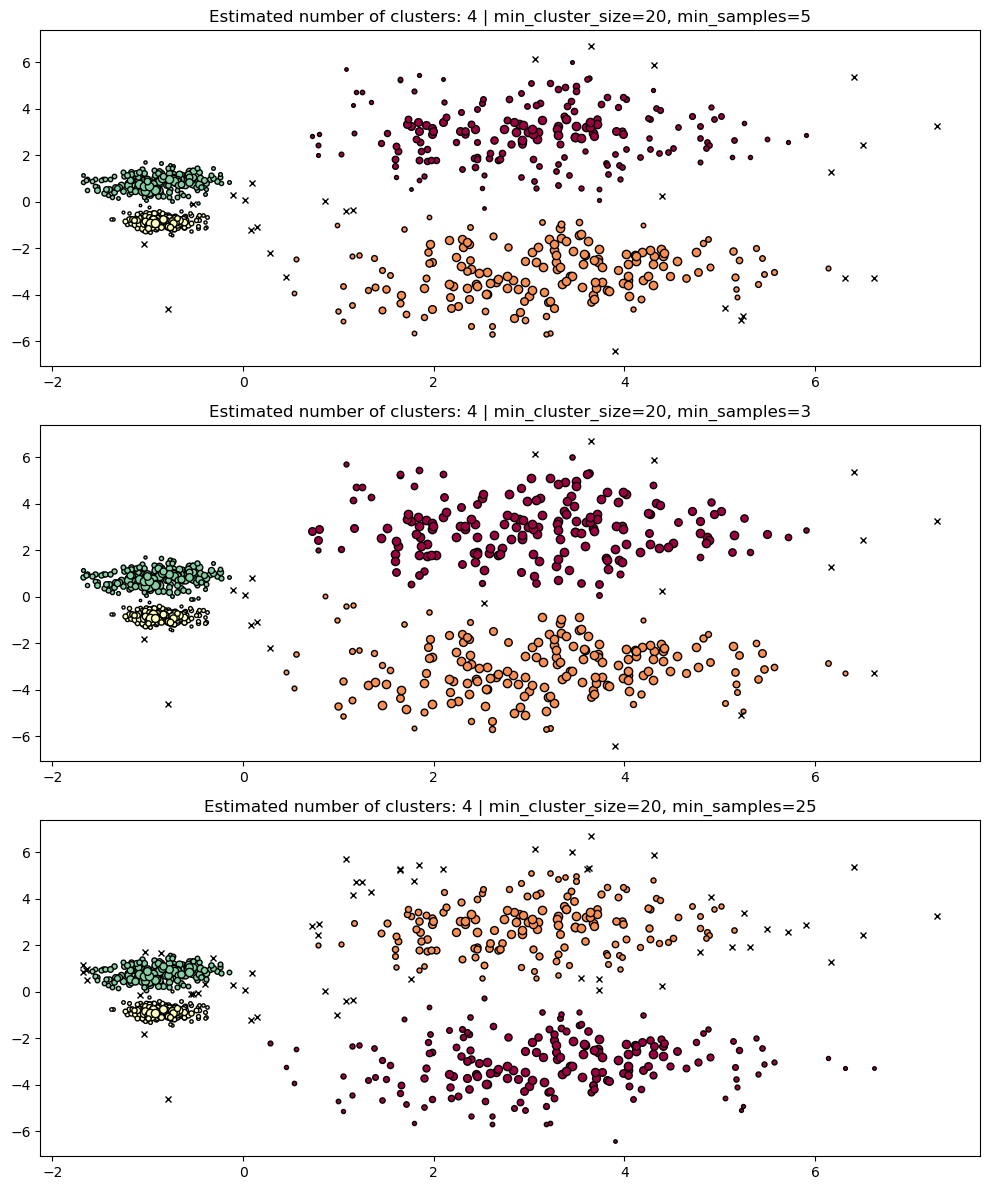

In [20]:
PARAM = (
    {"min_cluster_size": 20, "min_samples": 5},
    {"min_cluster_size": 20, "min_samples": 3},
    {"min_cluster_size": 20, "min_samples": 25},
)
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    hdb = hdbscan.HDBSCAN(**param).fit(X)
    plot(X, hdb.labels_, hdb.probabilities_, param, ax=axes[i])

c:\Users\innam\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\innam\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


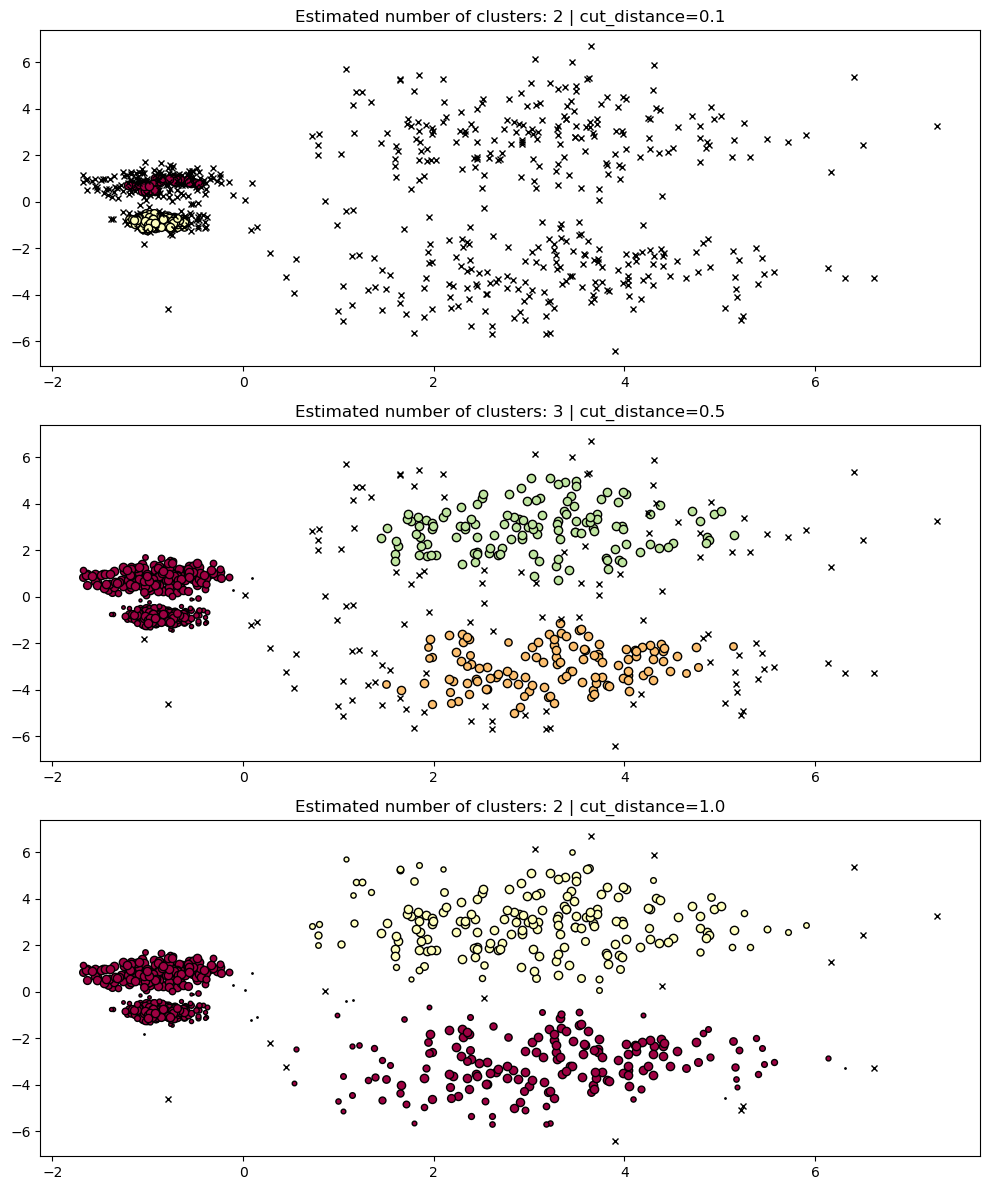

In [21]:
PARAM = (
    {"cut_distance": 0.1},
    {"cut_distance": 0.5},
    {"cut_distance": 1.0},
)
hdb = hdbscan.HDBSCAN().fit(X)
fig, axes = plt.subplots(len(PARAM), 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    labels = hdb.dbscan_clustering(**param)
    plot(X, labels, hdb.probabilities_, param, ax=axes[i])

In [22]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score untuk hasil clustering HDBSCAN
sil_score = silhouette_score(X, hdb.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.5743816709862986


In [23]:
from sklearn.metrics import davies_bouldin_score

# Menghitung Davies-Bouldin Index untuk hasil clustering HDBSCAN
dbi_score = davies_bouldin_score(X, hdb.labels_)
print(f"Davies-Bouldin Index: {dbi_score}")

Davies-Bouldin Index: 1.6436030674842073


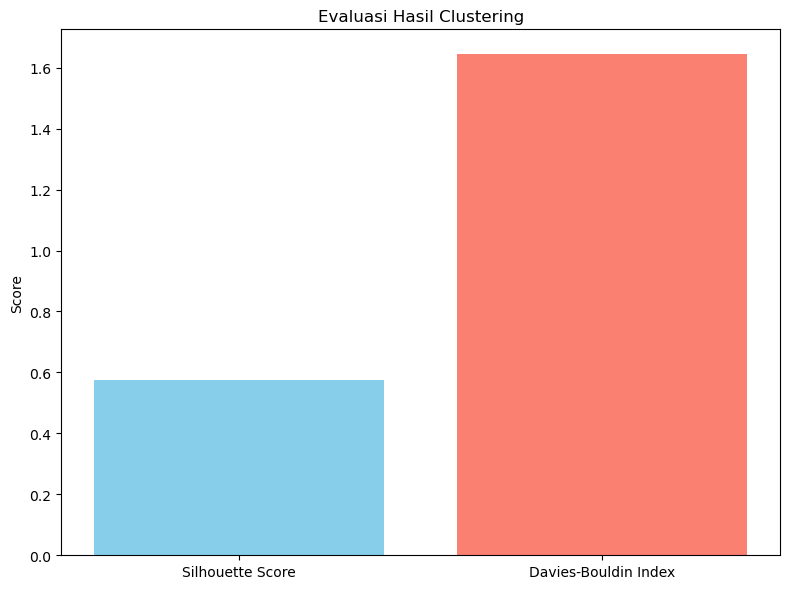

In [24]:
# Misalnya kita ingin membandingkan DBI dan Silhouette Score untuk beberapa eksperimen
scores = {
    "Silhouette Score": sil_score,
    "Davies-Bouldin Index": dbi_score
}

# Plot hasil evaluasi
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(scores.keys(), scores.values(), color=['skyblue', 'salmon'])
ax.set_title("Evaluasi Hasil Clustering")
ax.set_ylabel("Score")
plt.tight_layout()
plt.show()

## Tugas Praktikum 1

Preparation

In [27]:
from sklearn.preprocessing import StandardScaler

df2 = pd.read_csv("dataset/CC_Customer_Dataset.csv")
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [53]:
X2 = df2.drop(columns=['Sl_No', 'Customer Key'])
X2 = StandardScaler().fit_transform(X2)

Membuat model klasterisasi menggunakan Agglomerative Clustering

In [69]:
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = model.fit_predict(X2)   
df2['Cluster'] = labels

Membuat scatterplot dengan dua variabel

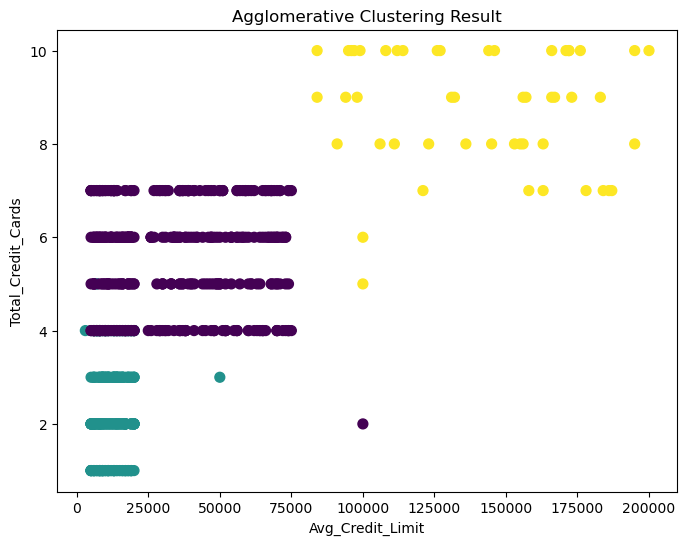

In [70]:
plt.figure(figsize=(8,6))
plt.scatter(df2['Avg_Credit_Limit'], df2['Total_Credit_Cards'], c=df2['Cluster'], cmap='viridis', s=50)
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.title('Agglomerative Clustering Result')
plt.show()

Menentukan silhoutte score dan DBI

In [71]:
sil_score = silhouette_score(X2, labels)
dbi_score = davies_bouldin_score(X2, labels)

print(f'Silhouette Coefficient: {sil_score}')
print(f'Davies-Bouldin Index: {dbi_score}')

Silhouette Coefficient: 0.5704543480595624
Davies-Bouldin Index: 0.5928598126739347


## Tugas Praktikum 2

Load dataset digit

In [7]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

HDBSCAN clustering

In [5]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean')
labels = clusterer.fit_predict(X)

c:\Users\innam\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\innam\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Hitung jumlah cluster & noise

In [10]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print("Jumlah cluster terbentuk:", n_clusters)
print("Jumlah noise:", n_noise)

Jumlah cluster terbentuk: 20
Jumlah noise: 589


Visualisasi dengan PCA

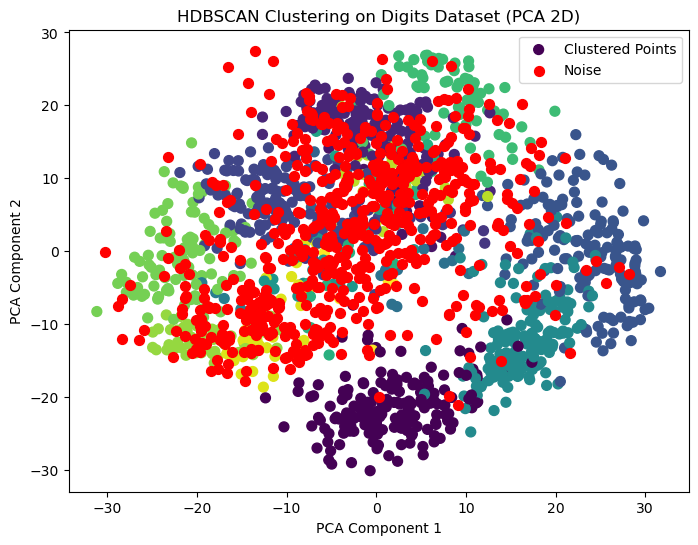

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[labels >= 0, 0], X_pca[labels >= 0, 1], 
            c=labels[labels >= 0], cmap='viridis', s=50, label='Clustered Points')
plt.scatter(X_pca[labels == -1, 0], X_pca[labels == -1, 1], 
            c='red', s=50, label='Noise')
plt.title('HDBSCAN Clustering on Digits Dataset (PCA 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()